In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

In [3]:
data.shape

(50730, 12)

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.isnull().sum()*100/len(data)

In [ ]:
data['Activity Period'].value_counts()

In [ ]:
data.columns

In [ ]:
# Time Series Data or IOT Data has Datetime or Date as a critical variable.
# In Multivariate Analysis variables extracted from date and date is deleted But in Time Series data Date Variable is most 
# critical variable which cannot be deleted.

# Date - "YYYY-mm-dd" or datetime - "YYYY-mm-dd HH:MM:SS" 

# 3 Types of Time Series Data 
# 1) UnivaritateTime Series = only 2 varibles - Date & y
# 2) Multivariate Time Series - Along with Date and Date extracted variable other independent variables will also be there.
# 3) Panel Data - Along with Date and other Independent Variables an ID variable will also be there (Company,Country,Region)

In [4]:
# Univariant Time Series 
airtraffic = data[['Activity Period','Passenger Count']]

In [5]:
data['Activity Period'] = data['Activity Period'].astype(str).apply(lambda x: f"{x[:4]}-{x[4:6]}")

In [6]:
airtraffic['Activity Period'] = pd.to_datetime(airtraffic['Activity Period'],errors = 'coerce')

C:\Users\Hp\AppData\Local\Temp\ipykernel_1820\2245588190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airtraffic['Activity Period'] = pd.to_datetime(airtraffic['Activity Period'],errors = 'coerce')


In [9]:
airtraffic.tail()

,Activity Period,Passenger Count
50725,1970-01-01 00:00:00.000202212,3197
50726,1970-01-01 00:00:00.000202212,5836
50727,1970-01-01 00:00:00.000202212,6650
50728,1970-01-01 00:00:00.000202212,1679
50729,1970-01-01 00:00:00.000202212,1857


In [8]:
airtraffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50730 entries, 0 to 50729
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Activity Period  50730 non-null  datetime64[ns]
 1   Passenger Count  50730 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 792.8 KB


In [ ]:
data

In [ ]:
# Resample Time Series into different Time Frequences
# "60Min" - hour, "D" - Daily, "M" - Monthly, "Q" - Quarterly, "A" - Annual

# Statistical Function typically sum() or mean() or median() must be given.

# After Resampling Date will be indexed into Row.

In [ ]:
airtraffic_monthly = airtraffic.resample("M",on="Activity Period").sum()

In [ ]:
airtraffic_monthly.head()

In [ ]:
airtraffic_monthly.tail()

In [ ]:
plt.figure(figsize=(20,8))
airtraffic_monthly.plot(kind='line')

In [ ]:
# Univariate Time Series Forecasting - Data must be stationary. Stationary means contant mean, conatant variance and 
# constant covariance.

# Typically Time shoud not effect data is Stationarity.

# Time series with trends, or with seasonality, are not stationary - the trend and seasonality will affect the value of the time
# series at different times.

# Trends - Up, Down, Horizontal or Neutral

# Seasonality - Based on 4 seasons - Summer, Rainy, Spring, Winter.

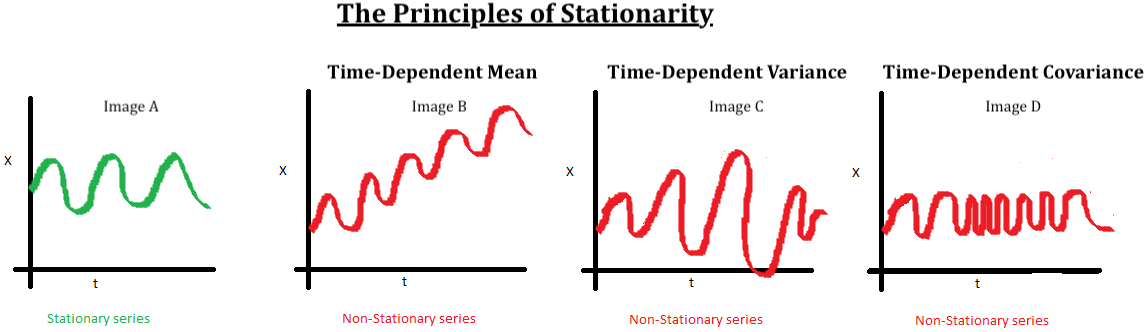

In [ ]:
# Augmented Dickey Fuller Test of Stationarity - Identifies the whether the stationary data is Stationary or Not.
# Null - Unit Root Present or Data is not Stationary.
# Alt  - No Unit Root or Data is Stationary

# A unit root process is a data-generating process whose first difference is stationary. In other words, 
# a unit root process yt has the form.
# yt = yt-1 + stationary process.

# Interpretation is baesd on p-value
# p-value less than 0.05, Reject Null
# p-value greater than 0.05, Fail to Reject Null

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(airtraffic_monthly)
# Since the value of p = 0.1943512840260691 is greater than 0.05, fail to reject.

In [ ]:
# Kwiatkowaski-Phillips-Schmidt-Schmidt-Shin(KPSS) test for stationaryity.
# null hypothesis that x is level or trend stationary.
# Alt hypothessis that x is not level or not trend stationary.

from statsmodels.tsa.stattools import kpss

In [ ]:
kpss(airtraffic_monthly)
# Since p-value = 0.1, is greater than 0.05, Fail to Reject Null.

In [ ]:
# if data is not staionary Differencing must be done
# y -          1,2,3,4,5,6,7,8,9,10
# lag 1 of y -  1,2,3,4,5,6,7,8,9,10
# lag 2 of y -   1,2,3,4,5,6,7,8,9,10

In [ ]:
airtraffic_monthly_diff = airtraffic_monthly.diff()

In [ ]:
airtraffic_monthly_diff = airtraffic_monthly_diff.dropna()

In [ ]:
airtraffic_monthly_diff.plot(kind='line')

In [ ]:
adfuller(airtraffic_monthly_diff)

In [ ]:
kpss(airtraffic_monthly_diff)

In [ ]:
# Decomposition of Time Series - Breaking Time Series into components 
# a) Trend - Up, Down, Neutral or Horizontal
# b) Seasonal - Based on 4 Seasons
# c) Cyclicality - Long Term Trend (8-12 years) - Business Cycle
# d) Random or Residual - Error y and lagged values of y

# Holt - Winters Method of Decomposition
# Additive Model (Non Seasonal Data) - yt = Tr+St+Ct+Rt
# Multiplcative Model (Seasonal Data) - yt = Tr*St*Ct*Rt

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
seasonal_decompose(airtraffic_monthly_diff).plot()

In [ ]:
# Univariate Time Series Forecasting - Many methods are there like 
# Simple Moving Average, Exponential Moving Average, Exponential Smoothing, Holt Winters and most importantly ARIMA.

# ARIMA - Autoregressive Integrated Moving Average: is a linear regression model with 2 equations for forecasting for future 
# time periods based on historical time periods.

# 2 Types of ARIMA
# 1) Non Seasonal ARIMA - ARIMA(p,d,q) - p,d,q are lags between 0,0,0 till 5,2,5.
# 2) Seasonal ARIMA - SARIMAX(p,d,q)[P,D,Q][time frequency] are seasonal parameters

# AR(P) - Autoregressor is linear relationship between y and lagged values of y.
# I (d) - Integrated refers to differencing to be done to bring data to stationary.
# MA(q) - Moving Average is linear relationship between errors and lagged errors or residuals.

# In ARIMA identiying the values for p,d,q are very critical d is the differencing that is done that lies between 0 to 2.

# The ACF plot or Autocorrelation plot identiies the lag value for MA(q)
# The PACF plot or Partial Autocorrelation plot identiies the lag value for AR(p)

# Blue are depicts 95% confidence level and indicates significance.Anything within blue area is statistcally close to zero and 
# anything above is statistically close to non zero.

# From ACF plot the first lag where there is a big change - value of q 
# from PACF plot the first where in becomes negative - value of p

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
plot_acf(airtraffic_monthly_diff)

In [ ]:
plot_pacf(airtraffic_monthly_diff)

In [ ]:
# Auto ARIMA is a function in pmdarima library that tries all combincations of p,q,d values from 0,0,0 till 5,2,5.
# Lagorder combination of p,q,d that has the least Alkaikas Information Criterion(AIC) is the best fit lag order

# By default builds SARIMAX model.
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
arima_model = auto_arima(airtraffic_monthly, start_p=0, start_q = 0)

In [ ]:
arima_model.summary()
# SARIMAX(0,1,0) = Non Seasonal Model
# AIC - 6279.860



In [ ]:
# Ljung Box test of residulas

# null - Model doesnot show lac of fit or model if Fine
# Al   - Model Does show Lack of Fit or model is fron Fine.

# p-value must be greter than 0.05, Failto Reject null.

# Since Prob(Q): 0.34 is greater than 0.05, fail to Reject Null.

In [ ]:
arima_model.predict(n_periods=24)

In [ ]:
plt.figure(figsize=(18,6))
arima_model.plot_diagnostics()

In [ ]:
index_of_fc = pd.date_range(airtraffic_monthly.index[-1],periods =24,freq='M')

In [ ]:
arimapredict =  pd.DataFrame(arima_model.predict(n_periods=24))

In [ ]:
arimapredict.index = index_of_fc

In [ ]:
plt.plot(airtraffic_monthly,label='Actual')
plt.plot(arimapredict,label='Forecast')
plt.legend()
plt.show()

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
airtraffic_monthly =  airtraffic_monthly.reset_index()

In [ ]:
airtraffic_monthly.columns=['ds','y']

In [ ]:
airtraffic_monthly

In [ ]:
m = prophet()
m.fit(airtraffic_monthly)

In [ ]:
future = m.make_future_dataframe(periods=24)

In [ ]:
forecast = m.predict(future)
np.round(forecast[['ds','yhat','yhat_lower','yhat_upper']]).tail()

In [ ]:
airtraffic_monthly